# Install & Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (mean_squared_error, r2_score,
                             mean_absolute_error, explained_variance_score,
                             max_error)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
plt.rcParams["figure.figsize"] = (12,5)
import warnings
warnings.filterwarnings('ignore')
!pip install openpyxl

# Load Data

In [ ]:
# Load CSV
# df = pd.read_csv("/content/IDMA1_WRF1DA.csv")
# df.columns = df.columns.str.strip()  # Remove spaces from column names
# df['WIB'] = pd.to_datetime(df['WIB'])
# df.set_index('WIB', inplace=True)

In [ ]:
# Load EXCEL
df = pd.read_excel("/content/IDMA1_WRF.xlsx", sheet_name="1DA")  # Ganti dengan nama file excel untuk tiap stasiun dan pilih sheet
df.columns = df.columns.str.strip()  # Remove spaces from column names
df['WIB'] = pd.to_datetime(df['WIB'])  # Convert 'WIB' column to datetime (Pastikan Kolom di file bernama WIB juga )
df.set_index('WIB', inplace=True)  # Set 'WIB' as the index

# Data Exploration

In [ ]:
# Display basic information and statistics
print(df.shape, df.info(), df.describe(), df.isna().sum(), sep='\n')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1325 entries, 2023-01-01 08:00:00 to 2023-11-01 06:00:00
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   DateTime                                    1325 non-null   object 
 1   WRF IDMA1                                   1325 non-null   float64
 2   sr_avg                                      1325 non-null   float64
 3   ws_avg                                      1325 non-null   float64
 4   ws_max                                      1325 non-null   float64
 5   wd_avg                                      1325 non-null   float64
 6   tt_air_max                                  1325 non-null   float64
 7   tt_air_avg                                  1325 non-null   float64
 8   tt_air_min                                  1325 non-null   float64
 9   rh_avg                                      1325 

In [ ]:
# Pilih Variabel (BAGIAN INI BISA DI UTAK-ATIK)
# Add hour, month, and day of year as new features
df['hour'] = df.index.hour
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear  # Adding day of the year feature

# Specify the required columns, including day_of_year
required_cols = ['sr_avg', 'WRF IDMA1', 'ws_avg', 'wd_avg',
                 'tt_air_avg', 'rh_avg', 'pp_air', 'hour','day_of_year','month']
df = df[required_cols]

In [ ]:
df.head(15)

,sr_avg,WRF IDMA1,ws_avg,wd_avg,tt_air_avg,rh_avg,pp_air,hour,day_of_year,month
WIB,,,,,,,,,,
2023-01-01 08:00:00,318.50,188.021378,1.461,272.5,25.47,92.10,1009.7530,8,1,1
2023-01-01 09:00:00,201.80,723.836548,2.573,282.0,25.60,88.70,1016.3740,9,1,1
2023-01-01 10:00:00,41.26,892.734375,1.421,275.9,23.92,95.30,1003.3790,10,1,1
2023-01-01 11:00:00,155.00,880.931457,1.325,275.7,24.21,97.30,1004.6120,11,1,1
2023-01-01 12:00:00,288.80,897.751587,2.003,278.3,25.19,93.30,1013.9740,12,1,1
2023-01-01 13:00:00,103.10,922.090149,2.108,268.7,24.66,95.00,1011.0790,13,1,1
2023-01-01 14:00:00,157.20,780.870178,2.850,276.2,24.76,91.80,1009.6010,14,1,1
2023-01-01 15:00:00,245.30,548.428467,2.718,273.5,25.94,86.60,1017.0670,15,1,1
2023-01-01 16:00:00,111.90,296.228363,1.504,251.4,26.28,88.20,1017.9780,16,1,1


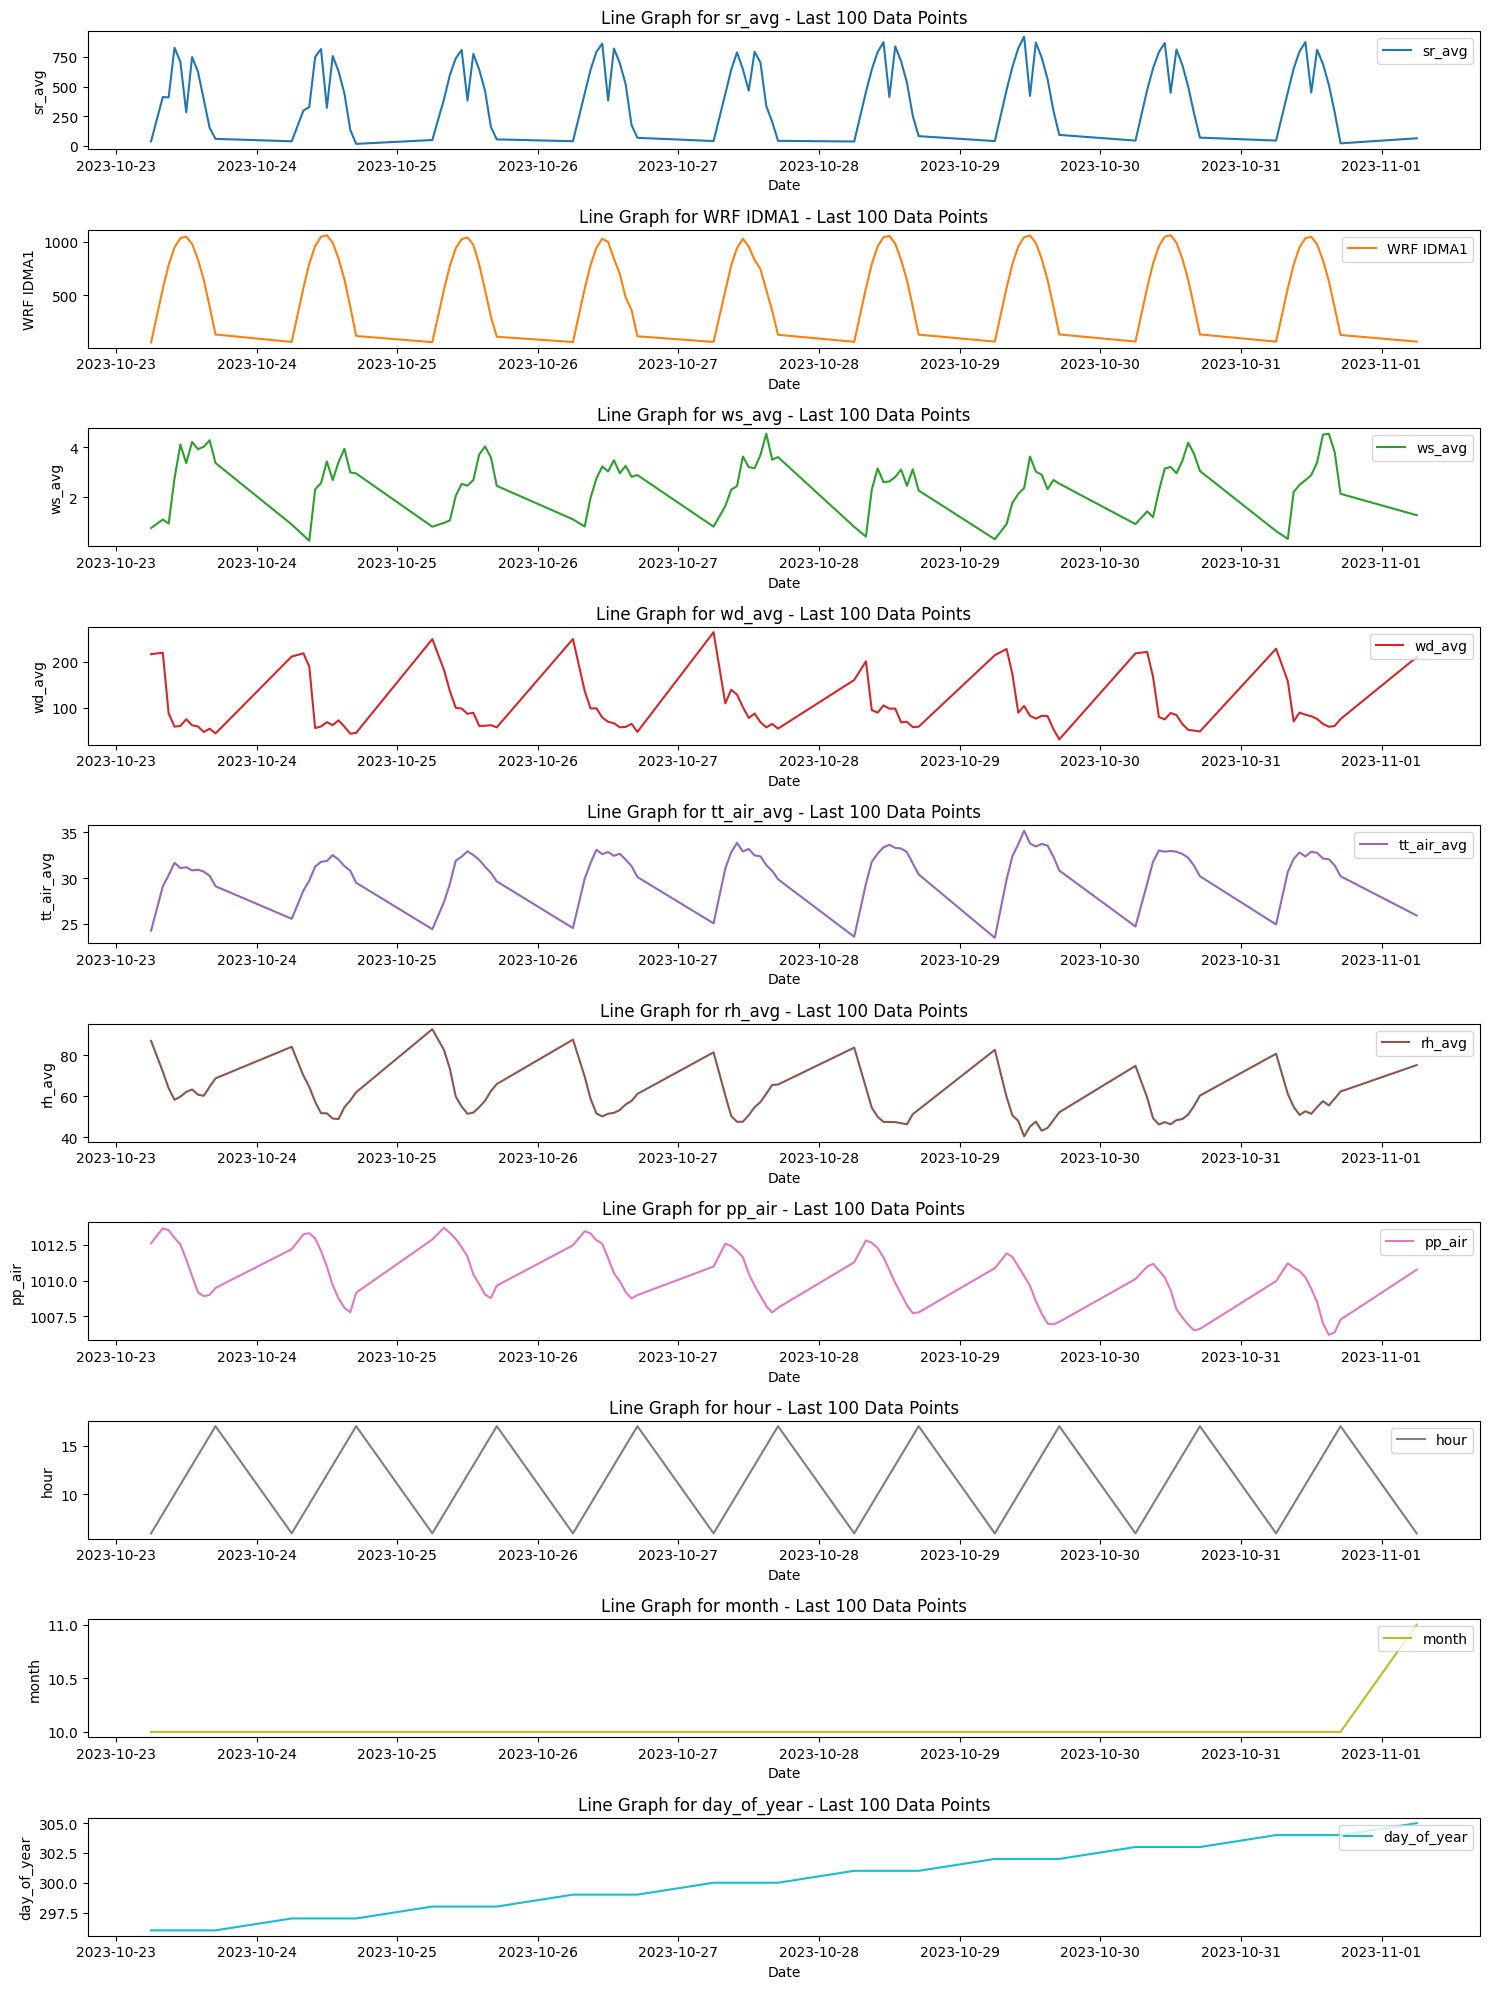

In [ ]:
# Import the required library for color mapping
from itertools import cycle

# Select the last 100 timesteps from the DataFrame
df_last_100 = df.tail(100)

# Create a figure with multiple subplots based on the number of variables
plt.figure(figsize=(15, 20))

# Define a color cycle from the 'tab10' colormap to assign different colors to each variable
color_cycle = cycle(plt.cm.tab10.colors)

# Loop through each column and create a line plot with a unique color
for i, column in enumerate(df_last_100.columns, 1):
    plt.subplot(len(df_last_100.columns), 1, i)  # Create a subplot for each variable
    plt.plot(df_last_100.index, df_last_100[column], label=column, color=next(color_cycle))  # Use different colors
    plt.title(f'Line Graph for {column} - Last 100 Data Points')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend(loc="upper right")

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

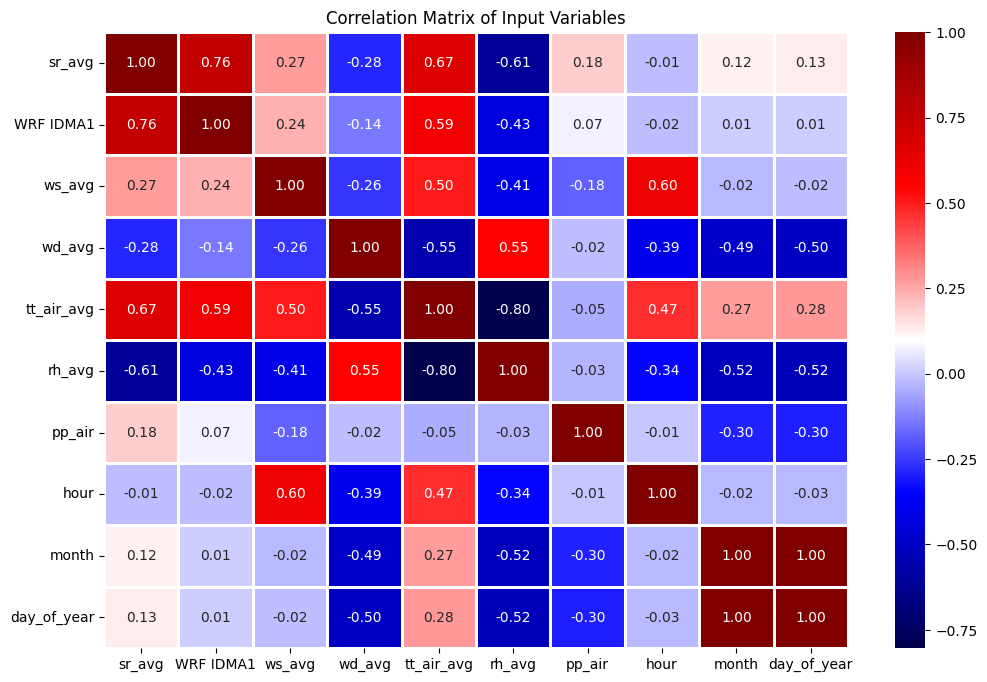

In [ ]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', linewidths=0.75, fmt=".2f")
plt.title('Correlation Matrix of Input Variables')
plt.show()

# Data Preprocessing

In [ ]:
# Split the dataset with new ratios
train_ratio, test_ratio = 0.8, 0.2
train_size = int(len(df) * train_ratio)
test_size = len(df) - train_size

# Split the dataset into training and testing sets
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [ ]:
# Sesuaikan dengan variabel yang sudah dipilih sebelumnya di atas
# Input Scaling (Variabel Input (X))
cols = ['WRF IDMA1', 'ws_avg', 'wd_avg', 'tt_air_avg', 'rh_avg', 'pp_air', 'hour','day_of_year','month']
scaler = RobustScaler()
train[cols] = scaler.fit_transform(train[cols])
test[cols] = scaler.transform(test[cols])

# Scaling sr_avg (Variabel Target (Y))
GHI_scaler = RobustScaler()
train['sr_avg'] = GHI_scaler.fit_transform(train[['sr_avg']])
test['sr_avg'] = GHI_scaler.transform(test[['sr_avg']])

print(f'Train size: {len(train)}, Test size: {len(test)}')

# Dataset Building

In [ ]:
######## Dataset Creation Function
def create_dataset(X, y, time_steps=1):
    """Creates dataset for training/testing without horizon"""
    Xs, ys = [], []
    for i in range(len(X) - time_steps + 1):
        Xs.append(X.iloc[i + time_steps - 1].values)  # Previous time step features
        ys.append(y.iloc[i + time_steps - 1])  # Target variable at the same time step
    return np.array(Xs), np.array(ys)

In [ ]:
# Create datasets
X_train, y_train = create_dataset(train[cols], train['sr_avg'], time_steps=1)
X_test, y_test = create_dataset(test[cols], test['sr_avg'], time_steps=1)

In [ ]:
print(f'X_ANN_train shape: {X_train.shape}, y_ANN_train shape: {y_train.shape}')

X_ANN_train shape: (1060, 9), y_ANN_train shape: (1060,)


# ANN

In [ ]:
# Build and compile the ANN model (MASIH BISA DIUTAK-ATIK UNITS & RATE NYA)
ann_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=40, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=1)
])

ann_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model and store the history (MASIH BISA DIUTAK-ATIK EPOCH & BATCH NYA)
history = ann_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.15, shuffle=False)

# Predictions
y_pred = ann_model.predict(X_test)
y_pred_inv = GHI_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_inv = GHI_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluation functions
def ANN_accuracy_metrics(y_true, y_pred):
    """Calculate and return specified performance metrics"""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    rrmse = (rmse / np.mean(y_true)) * 100  # Relative RMSE in percentage
    mbe = np.mean(y_pred - y_true)  # Mean Bias Error
    rmbe = (mbe / np.mean(y_true)) * 100  # Relative MBE in percentage
    metrics = {
        'RMSE': rmse,
        'rRMSE (%)': rrmse,
        'MBE': mbe,
        'rMBE (%)': rmbe
    }
    return metrics

# Calculate metrics
metrics = ANN_accuracy_metrics(y_test_inv, y_pred_inv)
print("\nANN Model Performance Metrics")
for metric, value in metrics.items():
    print(f'{metric}: {value:.4f}')

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.7099 - val_loss: 0.3121
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4871 - val_loss: 0.2260
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3980 - val_loss: 0.1709
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3585 - val_loss: 0.1352
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2867 - val_loss: 0.1148
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2651 - val_loss: 0.1003
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2461 - val_loss: 0.0918
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2151 - val_loss: 0.0854
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2409 - val_loss: 0.0797
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1955 - val_loss: 0.0749
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1861 - val_loss: 0.0737
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

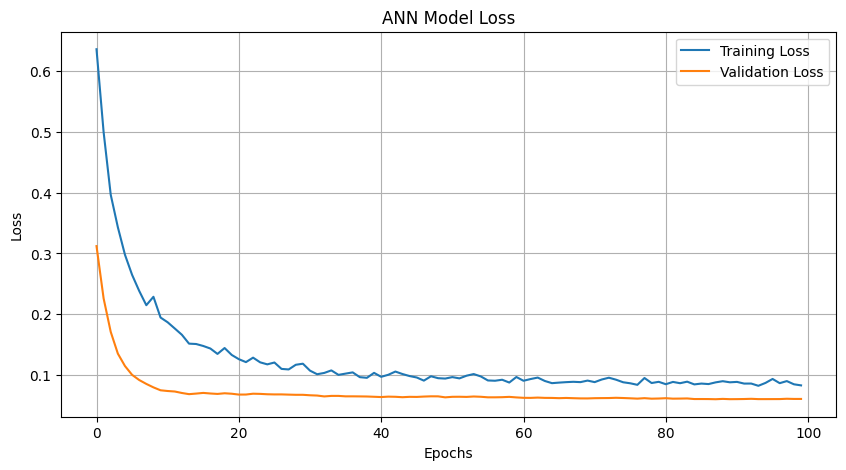

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

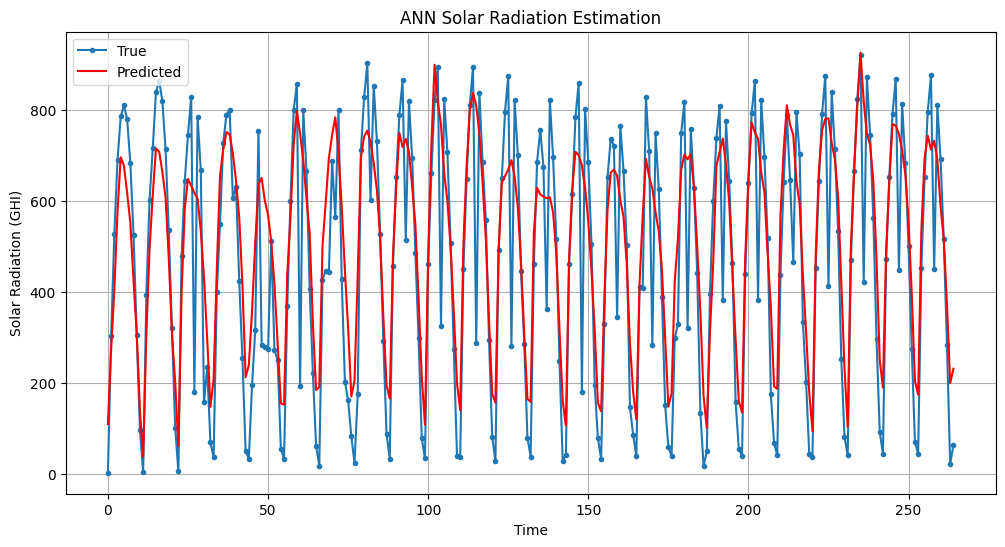

In [ ]:
# Side-by-Side Comparison Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, marker='.', label='True')
plt.plot(y_pred_inv, 'r', label='Predicted')
plt.title('ANN Solar Radiation Estimation')
plt.xlabel('Time')
plt.ylabel('Solar Radiation (GHI)')
plt.legend()
plt.grid()
plt.show()

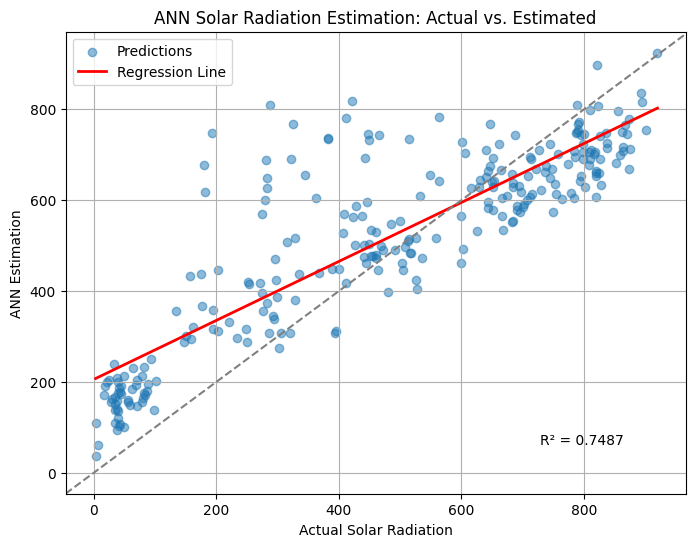

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Actual and Predicted values for solar radiation
y_true = y_test_inv.flatten()     # Actual values
y_pred = y_pred_inv.flatten()     # Predicted values

# Initialize linear regression model
model = LinearRegression()
model.fit(y_true.reshape(-1, 1), y_pred)  # Fit model for regression line

# Generate points for the regression line
x_line = np.linspace(y_true.min(), y_true.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

# Scatter plot and regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, label='Predictions', alpha=0.5)
plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Actual Solar Radiation')
plt.ylabel('ANN Estimation')
plt.title('ANN Solar Radiation Estimation: Actual vs. Estimated')
plt.axline((0, 0), slope=1, color='grey', linestyle='--')  # Diagonal reference line
plt.legend()
plt.grid()

# Calculate R² for plot annotation
r2_value = model.score(y_true.reshape(-1, 1), y_pred)
plt.text(0.9, 0.1, f'R² = {r2_value:.4f}', transform=plt.gca().transAxes, ha='right', va='bottom')

plt.show()


In [ ]:
# Assuming 'original_df' is the original unscaled DataFrame
# Prepare the DataFrame with the index (timestamp), actual and predicted 'sr_avg' values, and unscaled 'WRF IDMA1' column
results_df = pd.DataFrame({
    'WIB': test.index,                    # Use test dataset's index as timestamp (WIB)
    'Actual_sr_avg': y_test_inv,          # Actual 'sr_avg' values from the test set
    'WRF IDMA1': df.loc[test.index, 'WRF IDMA1'].values,  # 'WRF IDMA1' values from original DataFrame
    'ANN Estimation': y_pred_inv          # Predicted 'sr_avg' values from the model
})

# Set 'WIB' as the DataFrame index if desired
results_df.set_index('WIB', inplace=True)

In [ ]:
results_df.head(10)

,Actual_sr_avg,WRF IDMA1,ANN Estimation
WIB,,,
2023-07-11 06:00:00,3.036,41.483200,110.007790
2023-08-10 08:00:00,303.000,512.000916,273.612579
2023-08-10 09:00:00,527.200,727.415405,404.025635
2023-08-10 10:00:00,689.900,902.522461,577.806396
2023-08-10 11:00:00,784.800,998.668396,695.393799
2023-08-10 12:00:00,809.000,1037.452026,676.819458
2023-08-10 13:00:00,778.800,972.225708,616.948364
2023-08-10 14:00:00,682.800,828.645752,552.094360
2023-08-10 15:00:00,525.200,639.168335,423.277466


In [ ]:
# Export the DataFrame to an Excel file
results_df.to_excel('WRFANN_IDMA1_02.xlsx')
print("Results have been exported to 'solar_radiation_estimation_results.xlsx'")

Results have been exported to 'solar_radiation_estimation_results.xlsx'


------